In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("D:\Forage\Data\Delinquency_prediction_dataset.csv")
df = pd.DataFrame(data)
print(df)

    Customer_ID  Age    Income  Credit_Score  Credit_Utilization  \
0      CUST0001   56  165580.0         398.0            0.390502   
1      CUST0002   69  100999.0         493.0            0.312444   
2      CUST0003   46  188416.0         500.0            0.359930   
3      CUST0004   32  101672.0         413.0            0.371400   
4      CUST0005   60   38524.0         487.0            0.234716   
..          ...  ...       ...           ...                 ...   
495    CUST0496   71   48307.0         688.0            0.486522   
496    CUST0497   60   86180.0         836.0            0.608174   
497    CUST0498   54  152326.0         847.0            0.676950   
498    CUST0499   50  105852.0         343.0            0.700643   
499    CUST0500   25   40945.0         442.0            0.911370   

     Missed_Payments  Delinquent_Account  Loan_Balance  Debt_to_Income_Ratio  \
0                  3                   0       16310.0              0.317396   
1                  6   

In [2]:
# --- Initial Inspection ---
print("\n--- Dataset Head ---")
print(df.head())


--- Dataset Head ---
  Customer_ID  Age    Income  Credit_Score  Credit_Utilization  \
0    CUST0001   56  165580.0         398.0            0.390502   
1    CUST0002   69  100999.0         493.0            0.312444   
2    CUST0003   46  188416.0         500.0            0.359930   
3    CUST0004   32  101672.0         413.0            0.371400   
4    CUST0005   60   38524.0         487.0            0.234716   

   Missed_Payments  Delinquent_Account  Loan_Balance  Debt_to_Income_Ratio  \
0                3                   0       16310.0              0.317396   
1                6                   1       17401.0              0.196093   
2                0                   0       13761.0              0.301655   
3                3                   0       88778.0              0.264794   
4                2                   0       13316.0              0.510583   

  Employment_Status  Account_Tenure Credit_Card_Type     Location Month_1  \
0               EMP              18

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_ID           500 non-null    object 
 1   Age                   500 non-null    int64  
 2   Income                461 non-null    float64
 3   Credit_Score          498 non-null    float64
 4   Credit_Utilization    500 non-null    float64
 5   Missed_Payments       500 non-null    int64  
 6   Delinquent_Account    500 non-null    int64  
 7   Loan_Balance          471 non-null    float64
 8   Debt_to_Income_Ratio  500 non-null    float64
 9   Employment_Status     500 non-null    object 
 10  Account_Tenure        500 non-null    int64  
 11  Credit_Card_Type      500 non-null    object 
 12  Location              500 non-null    object 
 13  Month_1               500 non-null    object 
 14  Month_2               500 non-null    object 
 15  Month_3               5

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,500.0,46.266000,16.187629,18.00,33.000000,46.500000,59.250000,74.000000
Income,461.0,108379.893709,53662.723741,15404.00,62295.000000,107658.000000,155734.000000,199943.000000
Credit_Score,498.0,577.716867,168.881211,301.00,418.250000,586.000000,727.250000,847.000000
Credit_Utilization,500.0,0.491446,0.197103,0.05,0.356486,0.485636,0.634440,1.025843
Missed_Payments,500.0,2.968000,1.946935,0.00,1.000000,3.000000,5.000000,6.000000
Delinquent_Account,500.0,0.160000,0.366973,0.00,0.000000,0.000000,0.000000,1.000000
Loan_Balance,471.0,48654.428875,29395.537273,612.00,23716.500000,45776.000000,75546.500000,99620.000000
Debt_to_Income_Ratio,500.0,0.298862,0.094521,0.10,0.233639,0.301634,0.362737,0.552956
Account_Tenure,500.0,9.740000,5.923054,0.00,5.000000,10.000000,15.000000,19.000000


In [5]:
df.columns.tolist()

['Customer_ID',
 'Age',
 'Income',
 'Credit_Score',
 'Credit_Utilization',
 'Missed_Payments',
 'Delinquent_Account',
 'Loan_Balance',
 'Debt_to_Income_Ratio',
 'Employment_Status',
 'Account_Tenure',
 'Credit_Card_Type',
 'Location',
 'Month_1',
 'Month_2',
 'Month_3',
 'Month_4',
 'Month_5',
 'Month_6']

In [6]:
df.isnull().sum()

Customer_ID              0
Age                      0
Income                  39
Credit_Score             2
Credit_Utilization       0
Missed_Payments          0
Delinquent_Account       0
Loan_Balance            29
Debt_to_Income_Ratio     0
Employment_Status        0
Account_Tenure           0
Credit_Card_Type         0
Location                 0
Month_1                  0
Month_2                  0
Month_3                  0
Month_4                  0
Month_5                  0
Month_6                  0
dtype: int64

In [7]:
df.nunique()

Customer_ID             500
Age                      57
Income                  271
Credit_Score            234
Credit_Utilization      492
Missed_Payments           7
Delinquent_Account        2
Loan_Balance            300
Debt_to_Income_Ratio    487
Employment_Status         6
Account_Tenure           20
Credit_Card_Type          5
Location                  5
Month_1                   3
Month_2                   3
Month_3                   3
Month_4                   3
Month_5                   3
Month_6                   3
dtype: int64

In [8]:
# --- Missing Values Check ---
print("\n--- Missing Values Count ---")
print(df.isnull().sum())


--- Missing Values Count ---
Customer_ID              0
Age                      0
Income                  39
Credit_Score             2
Credit_Utilization       0
Missed_Payments          0
Delinquent_Account       0
Loan_Balance            29
Debt_to_Income_Ratio     0
Employment_Status        0
Account_Tenure           0
Credit_Card_Type         0
Location                 0
Month_1                  0
Month_2                  0
Month_3                  0
Month_4                  0
Month_5                  0
Month_6                  0
dtype: int64


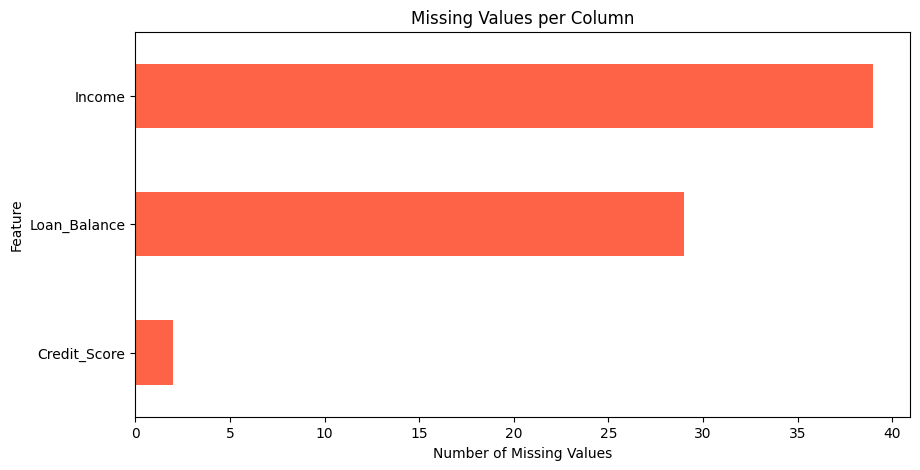

In [9]:
# Count missing values per column
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]  # Only show columns with missing values

# Plot bar chart
missing_counts.sort_values().plot(kind='barh', figsize=(10, 5), color='tomato')
plt.title("Missing Values per Column")
plt.xlabel("Number of Missing Values")
plt.ylabel("Feature")
plt.show()


In [10]:
print("\n--- Descriptive Statistics for Numerical Columns ---")
print(df.describe())


--- Descriptive Statistics for Numerical Columns ---
              Age         Income  Credit_Score  Credit_Utilization  \
count  500.000000     461.000000    498.000000          500.000000   
mean    46.266000  108379.893709    577.716867            0.491446   
std     16.187629   53662.723741    168.881211            0.197103   
min     18.000000   15404.000000    301.000000            0.050000   
25%     33.000000   62295.000000    418.250000            0.356486   
50%     46.500000  107658.000000    586.000000            0.485636   
75%     59.250000  155734.000000    727.250000            0.634440   
max     74.000000  199943.000000    847.000000            1.025843   

       Missed_Payments  Delinquent_Account  Loan_Balance  \
count       500.000000          500.000000    471.000000   
mean          2.968000            0.160000  48654.428875   
std           1.946935            0.366973  29395.537273   
min           0.000000            0.000000    612.000000   
25%           1

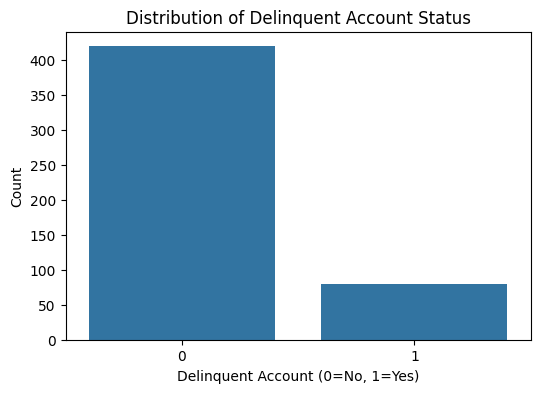


This code provides a basic EDA structure.


In [11]:
# --- Example of simple visualization ---
if 'Delinquent_Account' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x='Delinquent_Account', data=df)
    plt.title('Distribution of Delinquent Account Status')
    plt.xlabel('Delinquent Account (0=No, 1=Yes)')
    plt.ylabel('Count')
    plt.show()

print("\nThis code provides a basic EDA structure.")

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Logistic Regression with class balance and more iterations
model = LogisticRegression(max_iter=5000, class_weight='balanced')
model.fit(X_train, y_train)

# Evaluation
y_pred = model.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.63      0.72        86
           1       0.09      0.21      0.12        14

    accuracy                           0.57       100
   macro avg       0.46      0.42      0.42       100
weighted avg       0.73      0.57      0.63       100



📊 Top Correlated Features:
 Delinquent_Account      1.000000
Month_1                 0.094059
Month_6                 0.053047
Income                  0.043991
Credit_Score            0.034733
Debt_to_Income_Ratio    0.034386
Credit_Utilization      0.034224
Month_2                 0.027288
Age                     0.022508
Month_3                 0.013270
Name: Delinquent_Account, dtype: float64

📊 Top Features by Mutual Information:
 Month_3                 0.041804
Month_5                 0.025502
Month_4                 0.024656
Account_Tenure          0.023526
Age                     0.003710
Debt_to_Income_Ratio    0.003216
Month_6                 0.001354
Loan_Balance            0.000000
Employment_Status       0.000000
Income                  0.000000
dtype: float64


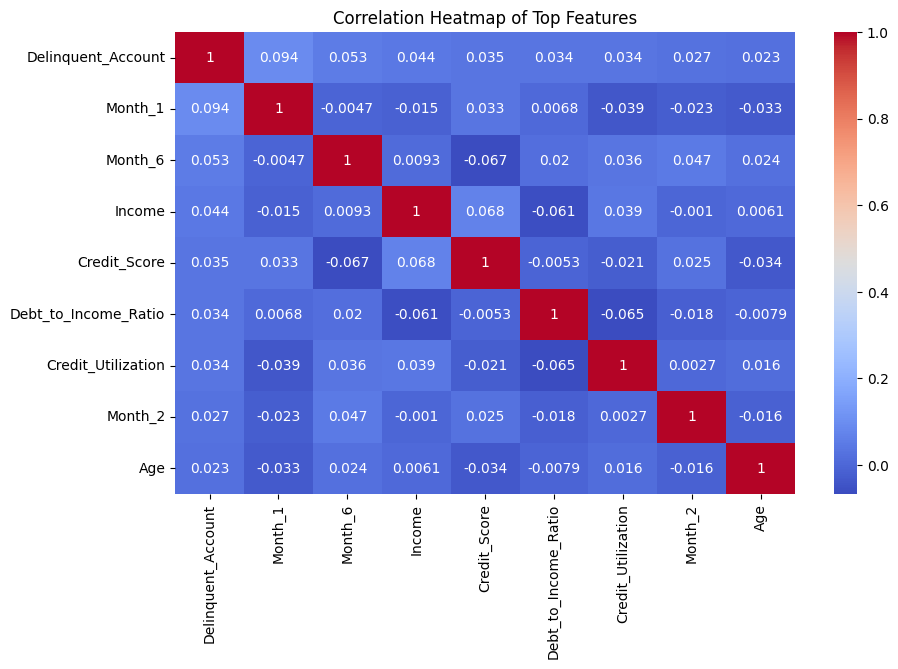

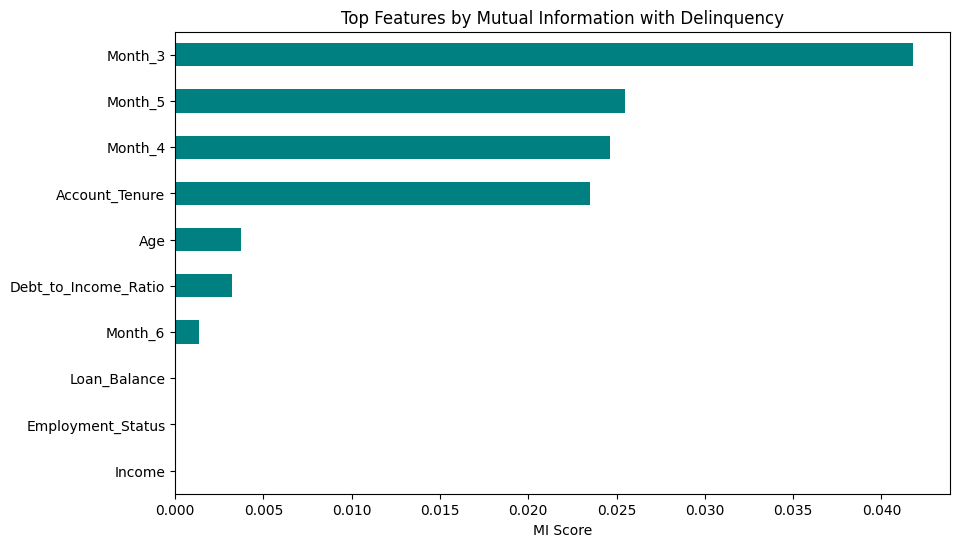

🔹 Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.83      0.63      0.72        86
           1       0.09      0.21      0.12        14

    accuracy                           0.57       100
   macro avg       0.46      0.42      0.42       100
weighted avg       0.73      0.57      0.63       100



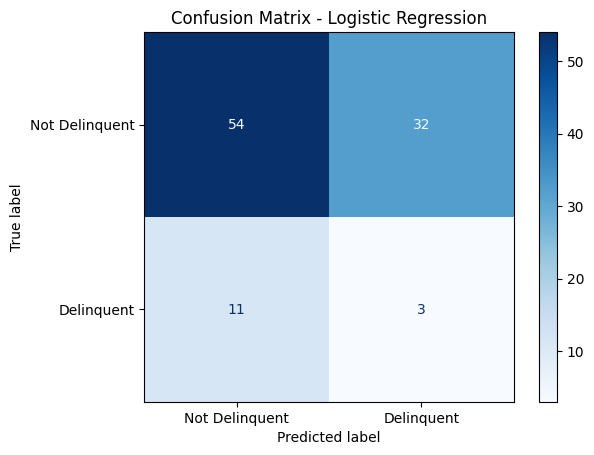

C:\Users\rg710\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\rg710\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\rg710\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

🔹 Random Forest Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92        86
           1       0.00      0.00      0.00        14

    accuracy                           0.86       100
   macro avg       0.43      0.50      0.46       100
weighted avg       0.74      0.86      0.80       100



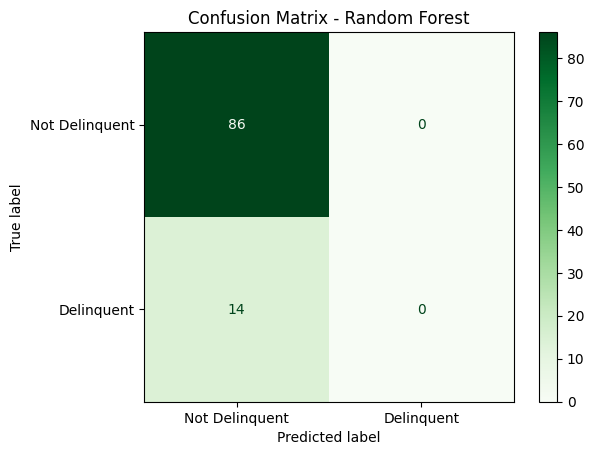


📌 High-Risk Indicators Summary:
- Month_3: High mutual information or correlation — may strongly impact delinquency.
- Month_5: High mutual information or correlation — may strongly impact delinquency.
- Month_4: High mutual information or correlation — may strongly impact delinquency.
- Account_Tenure: High mutual information or correlation — may strongly impact delinquency.
- Age: High mutual information or correlation — may strongly impact delinquency.
- Debt_to_Income_Ratio: High mutual information or correlation — may strongly impact delinquency.
- Month_6: High mutual information or correlation — may strongly impact delinquency.


In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# -----------------------------
# STEP 1: Load and Prepare Data
# -----------------------------
df = pd.read_csv("D:\Forage\Data\Delinquency_prediction_dataset.csv")

# Drop irrelevant columns
df.drop(columns=["Customer_ID"], inplace=True)

# Fill missing numeric values (safe way)
for col in ['Income', 'Credit_Score', 'Loan_Balance']:
    df[col] = df[col].fillna(df[col].median())

# Encode categorical features
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Separate features and target
X = df.drop("Delinquent_Account", axis=1)
y = df["Delinquent_Account"]

# -----------------------------
# STEP 2: Feature Analysis
# -----------------------------
# Correlation with target
correlations = df.corr()["Delinquent_Account"].sort_values(ascending=False)
print("📊 Top Correlated Features:\n", correlations.head(10))

# Mutual Information (non-linear dependencies)
mi_scores = mutual_info_classif(X, y, discrete_features='auto', random_state=42)
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)
print("\n📊 Top Features by Mutual Information:\n", mi_series.head(10))

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[correlations.index[:9]].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Top Features")
plt.show()

# MI bar plot
plt.figure(figsize=(10, 6))
mi_series.head(10).plot(kind='barh', color='teal')
plt.title("Top Features by Mutual Information with Delinquency")
plt.xlabel("MI Score")
plt.gca().invert_yaxis()
plt.show()

# -----------------------------
# STEP 3: Preprocessing
# -----------------------------
# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# -----------------------------
# STEP 4: Logistic Regression
# -----------------------------
log_model = LogisticRegression(max_iter=5000, class_weight='balanced')
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

print("🔹 Logistic Regression Report:\n", classification_report(y_test, log_pred))

# Confusion matrix
cm_log = confusion_matrix(y_test, log_pred)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=["Not Delinquent", "Delinquent"])
disp_log.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# -----------------------------
# STEP 5: Random Forest
# -----------------------------
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("🔹 Random Forest Report:\n", classification_report(y_test, rf_pred))

# Confusion matrix
cm_rf = confusion_matrix(y_test, rf_pred)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["Not Delinquent", "Delinquent"])
disp_rf.plot(cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.show()

# -----------------------------
# STEP 6: Risk Factor Summary
# -----------------------------
print("\n📌 High-Risk Indicators Summary:")
for feature in mi_series[mi_series > 0].index:
    print(f"- {feature}: High mutual information or correlation — may strongly impact delinquency.")

